In [1]:
from datetime import datetime, timedelta
from meteostat import Point, Daily
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
start_year = 1940

start = datetime(start_year, 1, 1)
end = datetime(2021, 12, 31)

# Austin, TX coords and altitude
location = Point(
    30.266666,   # latitude
    -97.733330,  # longitude
    489)         # feet

data = Daily(location, start, end)
data = data.fetch()

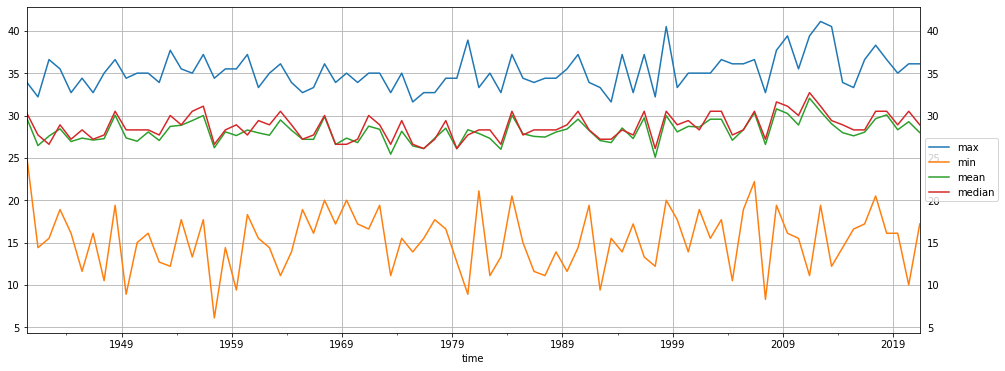

In [13]:


data_resampled = data['tmax'].loc[datetime(start_year, 6, 1):].resample('3M')

data_summer = pd.DataFrame({
    'max': data_resampled.max(),
    'min': data_resampled.min(),
    'mean': data_resampled.mean(),
    'median': data_resampled.median(),
})[::4]


plt.rcParams["figure.figsize"] = (16, 6)

data_summer.plot(y=[
    'max',
    'min',
    'mean',
    'median',
])

ax = plt.gca()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.tick_params(axis='y', which='both', labelleft='on', labelright='on')

plt.grid()
#plt.yticks(range(6, 42))
plt.show()




[DatetimeIndex(['1940-01-01', '1940-01-02', '1940-01-03', '1940-01-04',
                '1940-01-05', '1940-01-06', '1940-01-07', '1940-01-08',
                '1940-01-09', '1940-01-10',
                ...
                '2021-12-22', '2021-12-23', '2021-12-24', '2021-12-25',
                '2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
                '2021-12-30', '2021-12-31'],
               dtype='datetime64[ns]', name='time', length=29951, freq='D'),
 Index(['tavg', 'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres',
        'tsun'],
       dtype='object')]